In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-25.676085519578805, 38.23707349640421),
 (-32.361306287127555, -15.504589729372697),
 (-83.0279192680132, -154.31354405732202),
 (-83.3314896077289, -128.69255146485767),
 (58.997097430012815, -66.59879973192085),
 (9.21634646565083, -132.34984765057212),
 (-55.79623902004598, -92.24154590092415),
 (2.3913779139393228, -30.300716827317046),
 (-5.695874724070279, -122.73255219303351),
 (73.2977618988393, 76.93361659074242),
 (-52.655654941512495, 9.159314258841391),
 (3.6400335088264626, -20.861458323957436),
 (4.573373086711953, 143.50890559434447),
 (12.608803553603195, 78.10069990785695),
 (-31.884534928637933, 5.383749638169746),
 (30.840018834750495, -92.04859274067888),
 (2.848698334473923, -120.8689855414822),
 (-8.225814789654066, -59.63273774427037),
 (69.69992500620148, 173.7527374217865),
 (27.17642619868178, 75.51371416289871),
 (34.24475444415583, 127.85462164794455),
 (-58.129167814650394, 67.16705207229015),
 (-72.82065638149032, 74.58929306555638),
 (76.91393138700295

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b19f44b299f774130882793c1cc2a222


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | inhambane
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | goderich
Processing Record 12 of Set 1 | vanimo
Processing Record 13 of Set 1 | krishnagiri
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | opelousas
Processing Record 16 of Set 1 | aripuana
Processing Record 17 of Set 1 | komsomolskiy
Processing Record 18 of Set 1 | ringas
Processing Record 19 of Set 1 | fukue
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | narsaq
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | dalinghe
City not found. Skipping...
Processing Record 24 of Set 1 | taola

Processing Record 37 of Set 4 | saint-denis
Processing Record 38 of Set 4 | santa cruz
Processing Record 39 of Set 4 | diplo
Processing Record 40 of Set 4 | bilma
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | puerto carreno
Processing Record 43 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | souillac
Processing Record 46 of Set 4 | yarmouth
Processing Record 47 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 4 | bocas del toro
Processing Record 49 of Set 4 | halalo
City not found. Skipping...
Processing Record 50 of Set 4 | tilichiki
Processing Record 1 of Set 5 | prieska
Processing Record 2 of Set 5 | codrington
Processing Record 3 of Set 5 | teeli
Processing Record 4 of Set 5 | svobodnyy
Processing Record 5 of Set 5 | nikolskoye
Processing Record 6 of Set 5 | palmer
Processing Record 7 of Set 5 | san policarpo
Processing Record 8 of Set 5 | katherine
Processi

Processing Record 23 of Set 8 | baherden
Processing Record 24 of Set 8 | villa maria
Processing Record 25 of Set 8 | kieta
Processing Record 26 of Set 8 | emerald
Processing Record 27 of Set 8 | ilulissat
Processing Record 28 of Set 8 | tarakan
Processing Record 29 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 30 of Set 8 | troitsko-pechorsk
Processing Record 31 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 32 of Set 8 | kodinsk
Processing Record 33 of Set 8 | soe
Processing Record 34 of Set 8 | nuuk
Processing Record 35 of Set 8 | fort-shevchenko
Processing Record 36 of Set 8 | akyab
Processing Record 37 of Set 8 | takatsuki
Processing Record 38 of Set 8 | port-gentil
Processing Record 39 of Set 8 | karakendzha
City not found. Skipping...
Processing Record 40 of Set 8 | gudibanda
Processing Record 41 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 42 of Set 8 | latung
Processing Record 43 of Set 8 | harqalah
Processing Recor

City not found. Skipping...
Processing Record 12 of Set 12 | show low
Processing Record 13 of Set 12 | prince rupert
Processing Record 14 of Set 12 | isangel
Processing Record 15 of Set 12 | fort smith
Processing Record 16 of Set 12 | riyadh
Processing Record 17 of Set 12 | belaya gora
Processing Record 18 of Set 12 | kropotkin
Processing Record 19 of Set 12 | karaul
City not found. Skipping...
Processing Record 20 of Set 12 | thomaston
Processing Record 21 of Set 12 | osypenko
Processing Record 22 of Set 12 | deputatskiy
Processing Record 23 of Set 12 | kholodnyy
Processing Record 24 of Set 12 | buala
Processing Record 25 of Set 12 | juneau
Processing Record 26 of Set 12 | medea
Processing Record 27 of Set 12 | asau
Processing Record 28 of Set 12 | batagay
Processing Record 29 of Set 12 | kinwat
Processing Record 30 of Set 12 | lincoln
Processing Record 31 of Set 12 | jiroft
City not found. Skipping...
Processing Record 32 of Set 12 | along
Processing Record 33 of Set 12 | tabiauea
Ci

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Inhambane,-23.86,35.38,68.00,88,0,6.93,MZ,2020-07-29 18:29:28
1,Jamestown,42.10,-79.24,75.20,64,75,13.87,US,2020-07-29 18:26:56
2,Mataura,-46.19,168.86,47.97,89,100,4.03,NZ,2020-07-29 18:29:28
3,Rikitea,-23.12,-134.97,72.81,81,8,12.55,PF,2020-07-29 18:29:29
4,Iqaluit,63.75,-68.51,71.60,43,75,17.22,CA,2020-07-29 18:29:29


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Inhambane,MZ,2020-07-29 18:29:28,-23.86,35.38,68.00,88,0,6.93
1,Jamestown,US,2020-07-29 18:26:56,42.10,-79.24,75.20,64,75,13.87
2,Mataura,NZ,2020-07-29 18:29:28,-46.19,168.86,47.97,89,100,4.03
3,Rikitea,PF,2020-07-29 18:29:29,-23.12,-134.97,72.81,81,8,12.55
4,Iqaluit,CA,2020-07-29 18:29:29,63.75,-68.51,71.60,43,75,17.22


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
#(6.3.1)
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

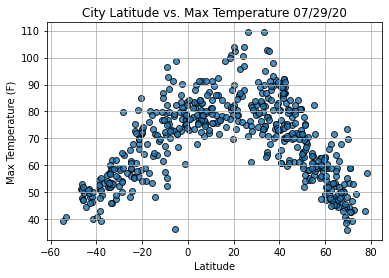

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

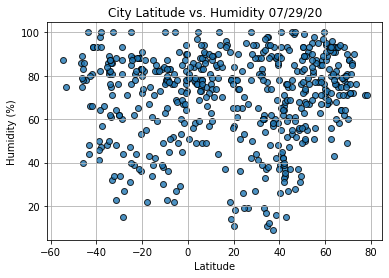

In [22]:
#(6.3.2) Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

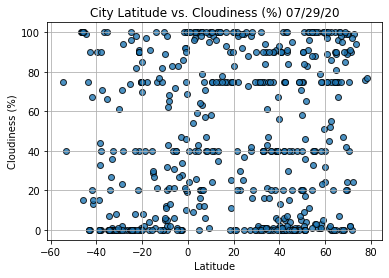

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

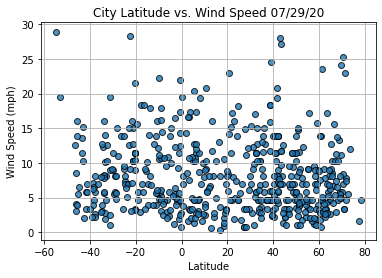

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [52]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(f"City Latitude vs. "+ y_label + " " + time.strftime("%x"))
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [53]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

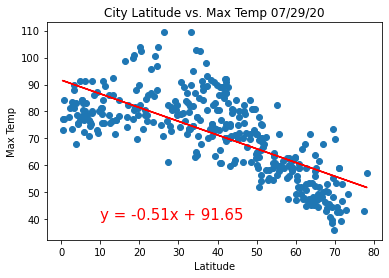

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Northern Hemisphere for Maximum Temperature", 'Max Temp',(10,40))

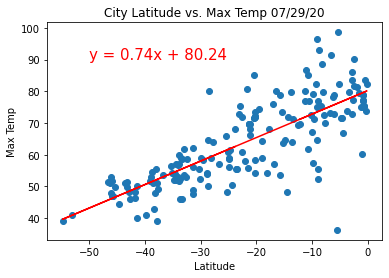

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

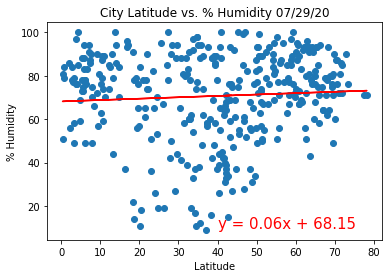

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

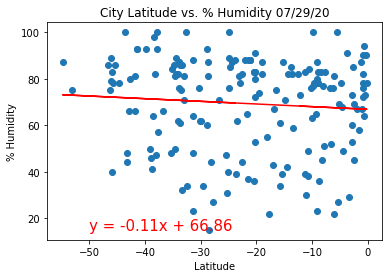

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [59]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Jamestown,US,2020-07-29 18:26:56,42.10,-79.24,75.20,64,75,13.87
4,Iqaluit,CA,2020-07-29 18:29:29,63.75,-68.51,71.60,43,75,17.22
8,Dikson,RU,2020-07-29 18:29:29,73.51,80.55,49.24,76,94,12.08
10,Goderich,CA,2020-07-29 18:29:29,43.75,-81.72,81.00,75,30,8.14
12,Krishnagiri,IN,2020-07-29 18:29:29,12.53,78.23,75.81,84,100,6.64


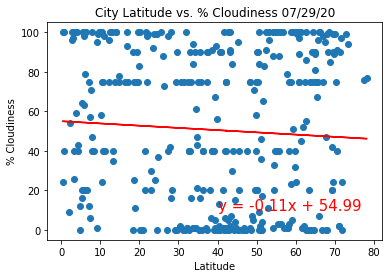

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

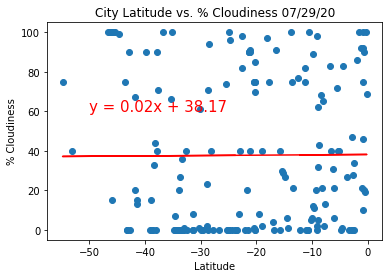

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

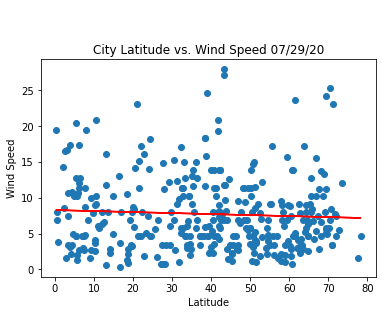

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

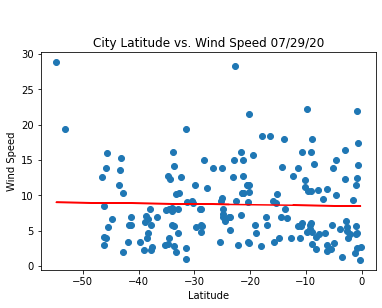

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))